# Inflation and its impact on key factors in the American economy

In [1]:
# The DST API wrapper
#%pip install git+https://github.com/alemartinello/dstapi

# A wrapper for multiple APIs with a pandas interface
#%pip install pandas-datareader

# For Venn diagrams
#%pip install matplotlib-venn

Imports and set magics:

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from matplotlib_venn import venn2
from pandas_datareader import wb

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject as dp

# Introduction

This project aims to investegate how inflation is correlated to the different key factors of the American economy. As such an approximation of the Phillips curve and fisher equation is constructed to verify the relationship between unemployment and inflation and how growth in GDP is very tightly correlated to inflation. This is used to observe how changes in inflation effect the behavoir of the FED setting the interest rate.
Economic theory states that a negative relationship between inflation and unemployment is present. This is presented through the Phillipscurve. In addition the relationship of inflation and interest are explained through the fisher equation which is given as follows:

$i = r + \pi $ note that this is without rational expations of agents and if the relationship breaks down it can stem from expectations diviating from realised values.

# Read and clean data

The importation of our data is done using an API. The data will be loaded from the world bank into four different dataframes which will be merges together after individual evaluation. The dataframes imported will cover inflation rates, employment rates and the real interest rate for the United States covering the time period 1990 to 2021.

**Fetch GDP:**

In [3]:
# Load GDP dataframe from wb using API
wb_USAgdp = wb.download(indicator='NY.GDP.MKTP.KD.ZG', country=['USA'], start=1990, end=2021)

wb_USAgdp = wb_USAgdp.rename(columns = {'NY.GDP.MKTP.KD.ZG':'GDP_growth'}) # Rename column
wb_USAgdp = wb_USAgdp.reset_index() # Reset the index int the table
wb_USAgdp.set_index("year", inplace=True) # Setting year as index for use in plots later
wb_USAgdp = wb_USAgdp.sort_index(ascending = True) # Sort dataframe in ascending order
wb_USAgdp.sample(5) # Show a sample of the dataframe


,country,GDP_growth
year,,
1990,United States,1.885965
2016,United States,1.667472
1994,United States,4.028793
2009,United States,-2.599888
1997,United States,4.447175


**Fetch inflation:**

In [4]:
# Load inflation dataframe from wb using API
wb_USAinf = wb.download(indicator='FP.CPI.TOTL.ZG', country=['USA'], start=1990, end=2021)

wb_USAinf = wb_USAinf.rename(columns = {'FP.CPI.TOTL.ZG':'Inflation_rate'}) # Rename column
wb_USAinf = wb_USAinf.reset_index() # Reset the index int the table
wb_USAinf.set_index("year", inplace=True) # Setting year as index for use in plots later
wb_USAinf = wb_USAinf.sort_index(ascending = True) # Sort dataframe in ascending order
wb_USAinf.sample(5) # Show a sample of the dataframe

,country,Inflation_rate
year,,
2010,United States,1.640043
2020,United States,1.233584
2012,United States,2.069337
2016,United States,1.261583
2001,United States,2.826171


**Fetch employment to population ratio:** 

In [5]:
# Load employment dataframe from wb using API
wb_USAemp = wb.download(indicator='SL.EMP.TOTL.SP.NE.ZS', country=['USA'], start=1990, end=2021)

wb_USAemp = wb_USAemp.rename(columns = {'SL.EMP.TOTL.SP.NE.ZS':'Employment_rate'}) # Rename column
wb_USAemp = wb_USAemp.reset_index() # Reset the index int the table
wb_USAemp.set_index("year", inplace=True) # Setting year as index for use in plots later
wb_USAemp = wb_USAemp.sort_index(ascending = True) # Sort dataframe in ascending order
wb_USAemp.sample(5) # Show a sample of the dataframe

,country,Employment_rate
year,,
1995,United States,62.95
2017,United States,60.11
2004,United States,62.35
1992,United States,61.50
2018,United States,60.42


**Fetch real interest rate:**

In [6]:
# Load real interest rate dataframe from wb using API
wb_USAreal = wb.download(indicator='FR.INR.RINR', country=['USA'], start=1990, end=2021)

wb_USAreal = wb_USAreal.rename(columns = {'FR.INR.RINR':'real_interest_rate'}) # Rename column
wb_USAreal = wb_USAreal.reset_index() # Reset the index int the table
wb_USAreal.set_index("year", inplace=True) # Setting year as index for use in plots later
wb_USAreal = wb_USAreal.sort_index(ascending = True) # Sort dataframe in ascending order
wb_USAreal.sample(5) # Show a sample of the dataframe

,country,real_interest_rate
year,,
2006,United States,4.726090
2004,United States,1.612311
1992,United States,3.884238
2005,United States,2.960506
2020,United States,2.210411


As wanted all of the data fecting have been executed as intended and produces wanted dataframes.

## Exploration of each data set

In the section plots of the different variables in the American economy are made to explore their individual development.

Plot of the American annual GDP growth:

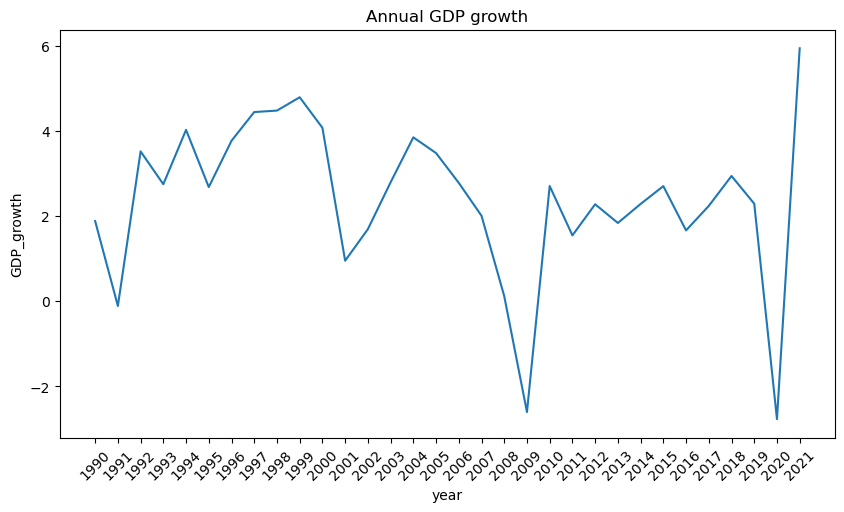

In [7]:
dp.plot_func(wb_USAgdp, "year", "GDP_growth", "Annual GDP growth" ) # Execute plot function from .py file

Plot of the American inflation rate:

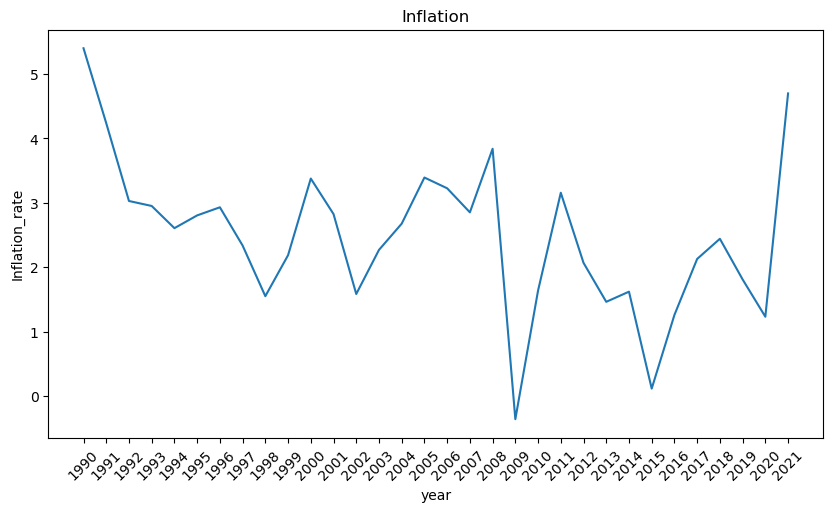

In [8]:
dp.plot_func(wb_USAinf, "year", "Inflation_rate", "Inflation" ) # Execute plot function from .py file

Plot of the American employment rate:

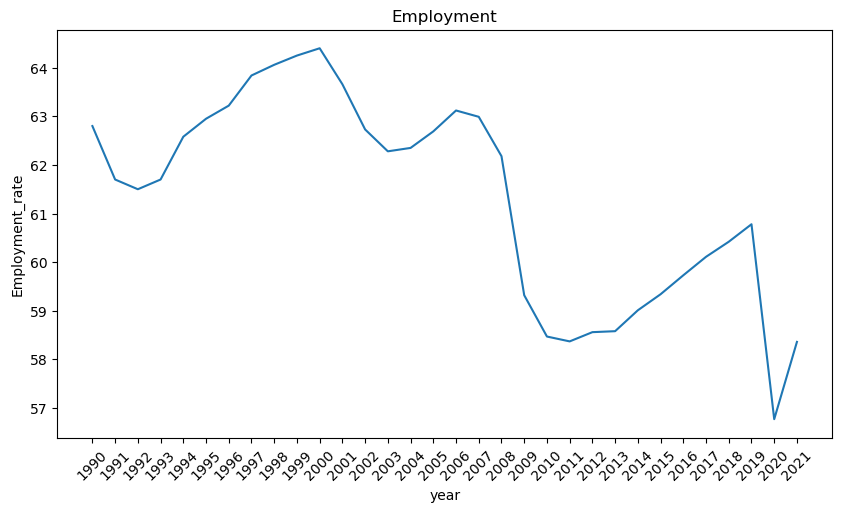

In [9]:
dp.plot_func(wb_USAemp, "year", "Employment_rate", "Employment" ) # Execute plot function from .py file

Plot of the American real interest rate:

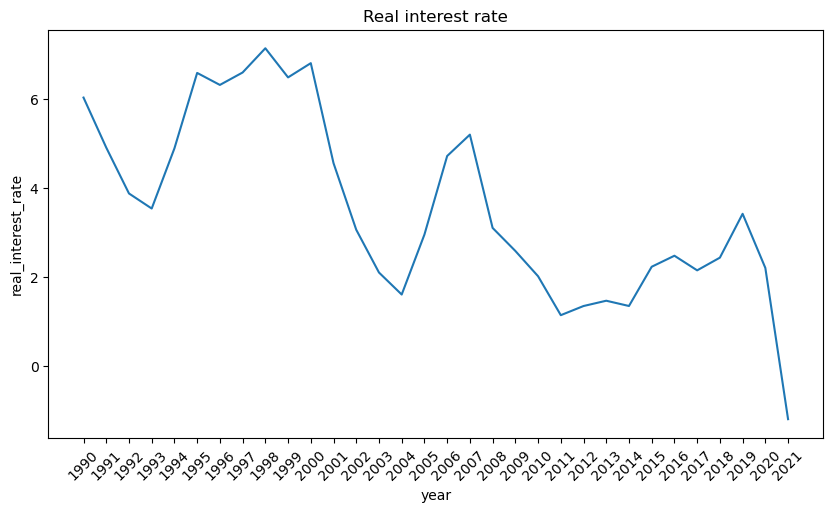

In [10]:
dp.plot_func(wb_USAreal, "year", "real_interest_rate", "Real interest rate" ) # Execute plot function from .py file

# Merging of data sets

**Merging the data sets**


*Note that data is loaded and cleaned from the start meaning the outer method will not include missing values.*


In [11]:
dataset = [wb_USAgdp, wb_USAinf, wb_USAemp, wb_USAreal] # Initialize the list to iterate over

la = dataset[0] # Define the baseline dataframe

for i in dataset[1:]: # Loop over the different dataframes
    la = pd.merge(la, i, how = 'outer', on = ['country','year'])

la = la.round(2) # set decimals to 2
la.head(10) # Shows head to ensure correct dateframe


,country,GDP_growth,Inflation_rate,Employment_rate,real_interest_rate
year,,,,,
1990,United States,1.89,5.40,62.80,6.04
1991,United States,-0.11,4.23,61.70,4.92
1992,United States,3.52,3.03,61.50,3.88
1993,United States,2.75,2.95,61.70,3.55
1994,United States,4.03,2.61,62.58,4.90
1995,United States,2.68,2.81,62.95,6.59
1996,United States,3.77,2.93,63.22,6.32
1997,United States,4.45,2.34,63.84,6.60
1998,United States,4.48,1.55,64.06,7.15


As the table above shows, the four dataframes are now merged together

# Analysis

We now want to calculate the nominal interest rate to observe the relationship between the real interest and inflation which can be approximated via the fisher equation

A variable of the nominal interest rate is added to the "la" dataframe using the fisher equation

In [12]:
la["Nominal_interest_rate"] = la.real_interest_rate + la.Inflation_rate # calculate new variable to the dataframe using fisher equation
la.sample(5) # Ensures correct dateframe

,country,GDP_growth,Inflation_rate,Employment_rate,real_interest_rate,Nominal_interest_rate
year,,,,,,
2004,United States,3.85,2.68,62.35,1.61,4.29
2017,United States,2.24,2.13,60.11,2.16,4.29
1994,United States,4.03,2.61,62.58,4.90,7.51
1992,United States,3.52,3.03,61.50,3.88,6.91
2016,United States,1.67,1.26,59.73,2.48,3.74


**Fischer approximation**

Now we want to plot the variables from the fischer equation to see how they depend on each other, and if this applies to economic theory

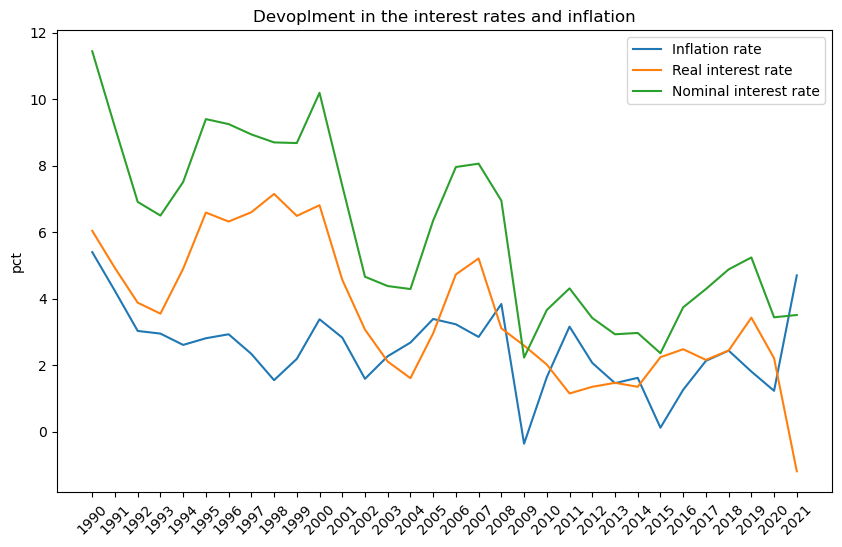

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
# Plotting directly from the pandas dataframe. Still using matplotlib under the hood.
plt.plot(la.Inflation_rate, label="Inflation rate") # Plot the inflation 
plt.plot(la.real_interest_rate, label="Real interest rate") # Plot the real interest    
plt.plot(la.Nominal_interest_rate, label="Nominal interest rate") # Plot nominal interest

ax.legend(frameon=True) # Shows legend
ax.set_xlabel('') # Label x axis
ax.set_ylabel('pct'); # Label y axis
ax.set_title("Devoplment in the interest rates and inflation") # Figure title
ax.tick_params(axis='x', rotation=45) # Rotate x-axis to fit labeling

The figure shows that for 1990-2021, the nominal interest rate and inflation tend to follow the same pattern of behaviour. It should be noted that for most of the periods this tendency seems to be consistant for the real interest rate aswell except for periods of economic turmoil where the FED seek to stimulate the economy by lowering the real interest rate (assuming that the FED follows a commited monetary policy strategy) which is the gap between the inflation rate and nominal interest. This is under the fischer equation which as mentioned is not entirely correct but a decent approximation.

**Phillips Curve**

We also want analyze the validity of the Phillips Curve which explains the relationship between the inflation rate and unemployment. theory dictates a negative corralation between the two. Although it has been discussed alot whether the Phillips Curve hold up in reality. This is just a high level approach to illutrate a potential relationship, and therefore a precise economic interpretation is not able to be made from this representation of the Phillips Curve without an expansion of theory.   

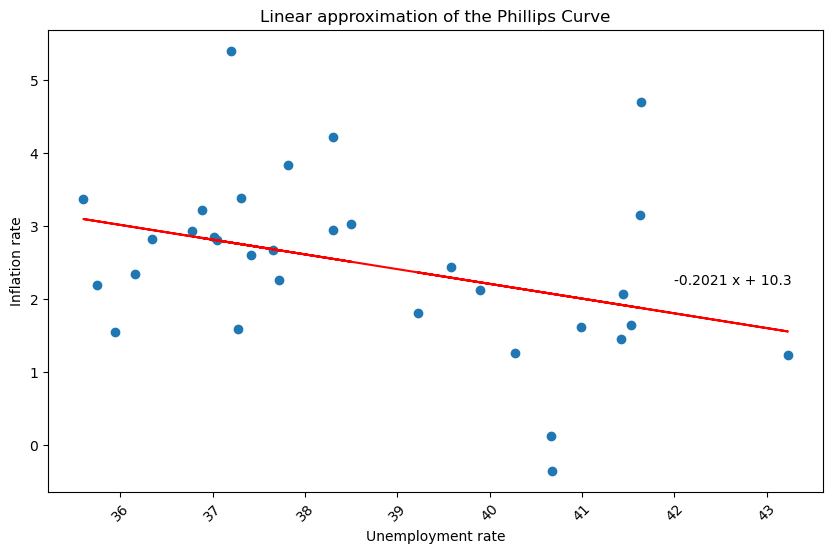

In [14]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(1,1,1)
# Plotting directly from the pandas dataframe. Still using matplotlib under the hood.
ax.scatter(100-la.Employment_rate, la.Inflation_rate)

# calculate and plot trendline
z = np.polyfit(100-la.Employment_rate, la.Inflation_rate, 1)
p = np.poly1d(z)
ax.plot(100-la.Employment_rate,p(100-la.Employment_rate),"r")

ax.text(42, 2.2, p) # add the equation for the trend to plot

ax.set_xlabel('Unemployment rate') # Label x-axis
ax.set_ylabel('Inflation rate'); # label y-axis
ax.set_title("Linear approximation of the Phillips Curve") # Set title 
ax.tick_params(axis='x', rotation=45) # Rotate x-axis to fit labeling

The relationship between inflation and unemployment seem to be negative as the theory dictates.

# Conclusion

Based on the the analysis it can be concluded that an indication of the obsverved relationsships and patterns are in line with what economic thoery would suggest. We find the relationship explained by the Phillips Curve, as data suggests a negative correlations between uneemployment and inflation. 
It is also observed that the nominal interest rate trends together with the changes in inflation which again comply with economic theory.
Data also suggest that a positive correlation exits between real interest rates and shocks to GDP confriming the anticipated response where central banks indirectly adjust real interest rates to stimulate economic activity when economic turmoil is present.

It is important to underline that our analysis does not provide a complete economic interpretation due to the simplicity of the model. In order to understand the underlying mechanisms in depth a requirement would be to extend the model with more details. However, the simplicity and overall findings contributes to the general understanding of the the Phillips Curve and the Fisher equation.